# ĐỀ KIỂM TRA CUỐI KỲ
## Học phần: Tối ưu hoá cho Khoa học dữ liệu
## Ngày: 16/12/2023
## Lớp: DHKHDL17A. Thời gian: 75 phút

Câu 1. (6 điểm) Cho ma trận $A=\begin{bmatrix}1 & 0\\ 0 & -4 \end{bmatrix}$ và vector $b=(2;2)$. Xét bài toán tối ưu sau 
$$\min_{x\in\mathbb{R}^2}f(x)=\dfrac{1}{2}\|Ax-b\|_2^2.$$

a) (2 điểm) Xác định điểm tối ưu $x^*$ và giá trị tối ưu $p^*$ của bài toán trên.

b) (2 điểm) Sử dụng thuật toán Gradient Descent, với giá trị $x$ ban đầu là $x^{(0)}=(-1;2)$, sử dụng learning rate lần lượt là $\dfrac{1}{7}$ và $\dfrac{1}{10}$ và thực hiện tối đa $100$ vòng lặp. In ra giá trị của $x^{(k)}$, $f(x^{(k)})$ tương ứng sau mỗi vòng lặp $k$ và vẽ đồ thị biểu thị cho sai số $|f(x^{(k)})-p^*|$ trong cả hai trường hợp của learning rate. Từ đó hãy đưa ra kết luận về sự hội tụ của thuật toán Gradient Descent trong từng trường hợp của learning rate.

c) (1 điểm) Tìm điều kiện cụ thể cho learning rate để thuật toán Gradient Descent của bài toán trên hội tụ.

d) (1 điểm) Trả lời câu a) với ma trận $A=\begin{bmatrix}1 & -2\\ 2 & -4 \end{bmatrix}$ và vector $b=(2;2)$.


In [17]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [110]:
# Câu a
A = np.array([[1, 0], [0, -4]])
b = np.array([2, 2])

def gradient(x):
    grad_x = x
    return grad_x

def cost(x):
    return (1/2)*np.linalg.norm(A.dot(x)-b)**2

def gradient_descent(eta, x0, max_iter=100, epsilon=1e-5):
    x = [x0]
    for i in range(max_iter):
        grad_x = gradient(x[-1])
        x_new = x[-1] - eta * grad_x
        if np.sqrt(gradient(grad_x**2)) < epsilon:
            break
        x.append(x_new)
    return x, i

# Áp dụng GD để tối ưu hóa hàm f(x, y)
x0 = 10  # Giá trị khởi tạo
eta = 0.1  # Learning rate
x, it = gradient_descent(eta, x0)
print(f'Diem toi uu: {x[-1]}')
print(f'Gia tri toi uu: {it}')

Diem toi uu: 0.00026561398887587435
Gia tri toi uu: 99


In [98]:
import numpy as np
from scipy.optimize import minimize

A = np.array([[1, 0], [0, -4]])
b = np.array([2, 2])
# Định nghĩa hàm mục tiêu
def objective_function(x):
    return 0.5 * np.linalg.norm(A.dot(x) - b)**2

# Định nghĩa gradient của hàm mục tiêu
def gradient(x):
    return A.T.dot(A.dot(x) - b)

# Định nghĩa ràng buộc
constraints = {'type': 'eq', 'fun': lambda x: A.dot(x) - b}

# Điểm khởi tạo
x0 = np.zeros(2)

# Giải bài toán tối ưu
result = minimize(objective_function, x0, jac=gradient, constraints=constraints)

# In kết quả
print('Point of minimum:', result.x)
print('Minimum value:', result.fun)

Point of minimum: [ 2.  -0.5]
Minimum value: 0.0


In [81]:
# Câu b
A = np.array([[1, 0], [0, -4]])
b = np.array([2, 2])

# Hàm số mục tiêu
def objective_function(x):
    return (1/2)*((A*x)**2 + (-b)**2)

# Đạo hàm của hàm số mục tiêu
def gradient(x):
    return A*x

def gradient_descent(learning_rate, max_iterations, initial_x):
    x = [initial_x]
    for i in range(max_iterations):
        grad_x = gradient(x[-1])
        x_new = x[-1] - learning_rate * grad_x
        if np.sqrt(gradient(grad_x**2).any()) < 1e-5:
            break
        x.append(x_new) 
    return x

learning_rate = 1/7
max_iterations = 100
initial_x = (-1, 2)
x = gradient_descent(learning_rate, max_iterations, initial_x)


# final_x = gradient_descent(learning_rate, max_iterations, initial_x)
print("Giá trị x sau mỗi vòng lặp:", x)
print("Giá trị f(x) tương ứng:", objective_function(x[-1]))

Giá trị x sau mỗi vòng lặp: [(-1, 2), array([[-0.85714286,  2.        ],
       [-1.        ,  3.14285714]]), array([[-0.73469388,  2.        ],
       [-1.        ,  4.93877551]]), array([[-0.62973761,  2.        ],
       [-1.        ,  7.76093294]]), array([[-0.53977509,  2.        ],
       [-1.        , 12.19575177]]), array([[-0.46266437,  2.        ],
       [-1.        , 19.16475278]]), array([[-0.39656946,  2.        ],
       [-1.        , 30.11604009]]), array([[-0.33991668,  2.        ],
       [-1.        , 47.32520585]]), array([[-0.29135715,  2.        ],
       [-1.        , 74.36818062]]), array([[ -0.2497347 ,   2.        ],
       [ -1.        , 116.86428383]]), array([[ -0.21405832,   2.        ],
       [ -1.        , 183.64387459]]), array([[-1.83478556e-01,  2.00000000e+00],
       [-1.00000000e+00,  2.88583231e+02]]), array([[-1.57267334e-01,  2.00000000e+00],
       [-1.00000000e+00,  4.53487935e+02]]), array([[-1.34800572e-01,  2.00000000e+00],
       [-1.0000

In [80]:
# Câu b
A = np.array([[1, 0], [0, -4]])
b = np.array([2, 2])

# Hàm số mục tiêu
def objective_function(x):
    return (1/2)*((A*x)**2 + (-b)**2)

# Đạo hàm của hàm số mục tiêu
def gradient(x):
    return A*x

def gradient_descent(learning_rate, max_iterations, initial_x):
    x = [initial_x]
    for i in range(max_iterations):
        grad_x = gradient(x[-1])
        x_new = x[-1] - learning_rate * grad_x
        if np.sqrt(gradient(grad_x**2).any()) < 1e-5:
            break
        x.append(x_new) 
    return x

learning_rate = 1/10
max_iterations = 100
initial_x = (-1, 2)
x = gradient_descent(learning_rate, max_iterations, initial_x)

# final_x = gradient_descent(learning_rate, max_iterations, initial_x)
print("Giá trị x sau mỗi vòng lặp:", x)
print("Giá trị f(x) tương ứng:", objective_function(x[-1]))

Giá trị x sau mỗi vòng lặp: [(-1, 2), array([[-0.9,  2. ],
       [-1. ,  2.8]]), array([[-0.81,  2.  ],
       [-1.  ,  3.92]]), array([[-0.729,  2.   ],
       [-1.   ,  5.488]]), array([[-0.6561,  2.    ],
       [-1.    ,  7.6832]]), array([[-0.59049,  2.     ],
       [-1.     , 10.75648]]), array([[-0.531441,  2.      ],
       [-1.      , 15.059072]]), array([[-0.4782969,  2.       ],
       [-1.       , 21.0827008]]), array([[-0.43046721,  2.        ],
       [-1.        , 29.51578112]]), array([[-0.38742049,  2.        ],
       [-1.        , 41.32209357]]), array([[-0.34867844,  2.        ],
       [-1.        , 57.850931  ]]), array([[-0.3138106 ,  2.        ],
       [-1.        , 80.99130339]]), array([[ -0.28242954,   2.        ],
       [ -1.        , 113.38782475]]), array([[ -0.25418658,   2.        ],
       [ -1.        , 158.74295465]]), array([[ -0.22876792,   2.        ],
       [ -1.        , 222.24013651]]), array([[-2.05891132e-01,  2.00000000e+00],
       [-1.

[array([-1,  2]), array([-0.57142857, -3.71428571]), array([-0.20408163,  3.63265306]), array([ 0.11078717, -5.81341108]), array([0.38067472, 6.33152853]), array([ 0.6120069 , -9.28339382]), array([ 0.81029163, 10.79293492]), array([  0.98024997, -15.01948775]), array([ 1.12592854, 18.16791282]), array([  1.2507959, -24.5016022]), array([ 1.35782505, 30.35920283]), array([  1.44956433, -40.17611792]), array([ 1.528198  , 50.51215161]), array([  1.59559828, -66.08705207]), array([ 1.65336996, 83.82620981]), array([   1.70288854, -108.91941261]), array([  1.74533303, 138.89638764]), array([   1.78171403, -179.72392697]), array([  1.81289774, 229.93076324]), array([   1.83962663, -296.76812417]), array([  1.86253711, 380.41615965]), array([   1.88217467, -490.24934812]), array([  1.89900686, 629.17773329]), array([   1.91343445, -810.08565709]), array([   1.92580096, 1040.39584483]), array([    1.93640082, -1338.79465764]), array([   1.94548642, 1720.16455983]), array([ 1.95327407e+00, -2

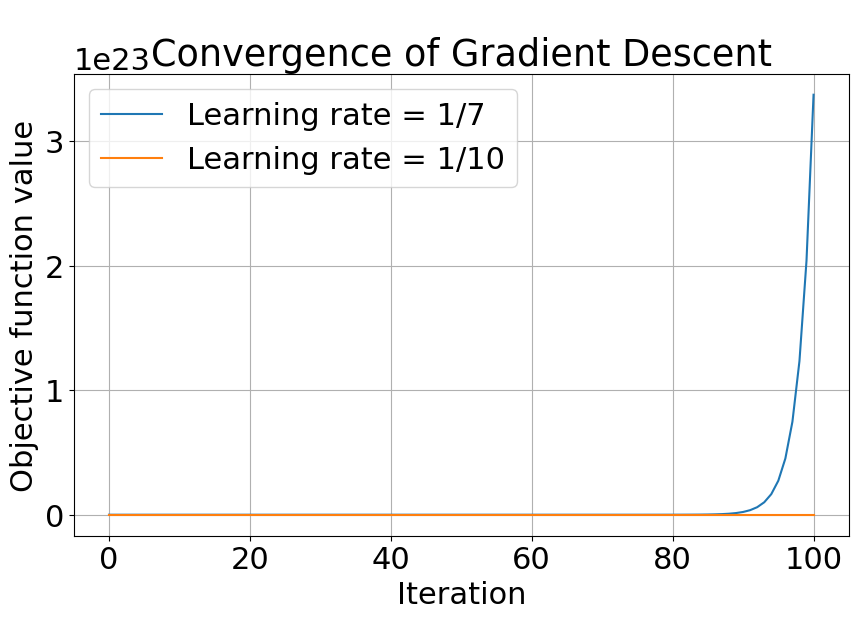

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm mục tiêu
def objective_function(x):
    return 0.5 * np.linalg.norm(A.dot(x) - b)**2

# Gradient của hàm mục tiêu
def gradient(x):
    return A.T.dot(A.dot(x) - b)

# Gradient Descent
def gradient_descent(learning_rate, max_iter):
    x = np.array([-1, 2])  # Điểm khởi tạo x0
    x_vals = [x]  # Lưu giá trị của x sau mỗi vòng lặp
    f_vals = [objective_function(x)]  # Lưu giá trị của f(x) sau mỗi vòng lặp

    for k in range(max_iter):
        x = x - learning_rate * gradient(x)
        x_vals.append(x)
        f_vals.append(objective_function(x))

    return x_vals, f_vals

# Ma trận A và vector b
A = np.array([[1, 0], [0, -4]])
b = np.array([2, 2])

# Thực hiện Gradient Descent với learning rate = 1/7
lr_1 = 1/7
max_iter = 100

x_vals_1, f_vals_1 = gradient_descent(lr_1, max_iter)
print(f'{x_vals_1}, {f_vals_1}')

# Thực hiện Gradient Descent với learning rate = 1/10
lr_2 = 1/10

x_vals_2, f_vals_2 = gradient_descent(lr_2, max_iter)
print(f'{x_vals_2}, {f_vals_2}')


# Vẽ đồ thị
plt.figure(figsize=(10, 6))
k_vals = range(max_iter + 1)

plt.plot(k_vals, f_vals_1, label='Learning rate = 1/7')
plt.plot(k_vals, f_vals_2, label='Learning rate = 1/10')

plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.title('Convergence of Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
import numpy as np

# Ma trận A và hằng số Lipschitz
A = np.array([[1, 0], [0, -4]])
L = np.max(np.linalg.eigvals(A.T.dot(A)))

# Tìm điều kiện cụ thể cho learning rate
learning_rate_condition = 2 / L

print("Specific condition for learning rate:", learning_rate_condition)

Specific condition for learning rate: 0.125


In [33]:
# Câu d
# Câu a
A = np.array([[1, 2], [-2, 4]])
b = np.array([2, 2])

def gradient(x):
    grad_x = x
    return grad_x

def cost(x):
    return (1/2)*((A*x)**2 + (-b)**2)

def gradient_descent(eta, x0, max_iter=100, epsilon=1e-5):
    x = [x0]
    for i in range(max_iter):
        grad_x = gradient(x[-1])
        x_new = x[-1] - eta * grad_x
        x.append(x_new)
        if gradient(x_new) < epsilon:
            break
    return x, i

# Áp dụng GD để tối ưu hóa hàm f(x, y)
x0 = 10 # Giá trị khởi tạo
eta = 0.1  # Learning rate
x, it = gradient_descent(eta, x0)
print(f'Diem toi uu: {x[-1]}')
print(f'Gia tri toi uu: {it}')

Diem toi uu: 0.00026561398887587435
Gia tri toi uu: 99


In [112]:
import numpy as np
from scipy.optimize import minimize

A = np.array([[1, 2], [-2, -4]])
b = np.array([2, 2])
# Định nghĩa hàm mục tiêu
def objective_function(x):
    return 0.5 * np.linalg.norm(A.dot(x) - b)**2

# Định nghĩa gradient của hàm mục tiêu
def gradient(x):
    return A.T.dot(A.dot(x) - b)

# Định nghĩa ràng buộc
constraints = {'type': 'eq', 'fun': lambda x: A.dot(x) - b}

# Điểm khởi tạo
x0 = np.zeros(2)

# Giải bài toán tối ưu
result = minimize(objective_function, x0, jac=gradient, constraints=constraints)

# In kết quả
print('Point of minimum:', result.x)
print('Minimum value:', result.fun)

Point of minimum: [ 1.16831852e+15 -5.84159259e+14]
Minimum value: 4.000000000000001


Câu 2. (4 điểm) Cho ma trận $A=\begin{bmatrix}1 & 0 & 0\\ 0 & 2 & 0 \\ 0 & 0 & 3 \end{bmatrix}$ và vector $b=(1/2;1; 3/2)$. Xét bài toán tối ưu sau $\begin{align}
\min_{x=(x_1,x_2,x_3)\in\mathbb{R}^3}\;\;\; &f_0(x)=\sum_{i=1}^3x_i\log x_i\\
\text{subject to }\;\;\; & Ax\geq b, \quad\quad\quad\quad \quad (1) \\
& \mathbf{1}^Tx=\dfrac{3}{2}.
\end{align}$

a) (1 điểm) Xác định hàm Lagrange $L(x,\lambda,v)$ cho bài toán $(1)$.

b) (2 điểm) Gọi $x^*$ và $(\lambda^*, v^*)$ lần lượt là điểm tối ưu của bài toán $(1)$ và bài toán đối ngẫu của nó. Viết điều kiện Karush-Kuhn-Tucker (KKT) cho $x^*$ và $(\lambda^*, v^*)$.

c) (1 điểm) Tìm một giá trị của $x^*$ và $(\lambda^*, v^*)$ thoả điều kiện KKT vừa tìm được ở câu b), từ đó đưa ra giá trị tối ưu cho bài toán $(1)$.

Lưu ý: sinh viên hoàn thành Câu 2 theo mẫu dưới đây.

a) Hàm Lagrange $L(x,\lambda,v)= \sum_{i=1}^3x_i\log x_i + \lambda_{1}(Ax-b) + \lambda_{2}(\mathbf{1}^Tx - \dfrac{3}{2})$.

b) Điều kiện KKT

(i) 

(ii)

(iii)

(iv)

(v)

c) Giải hệ 5 phương trình tìm được ở câu b)

In [103]:
A = np.array([[1, 0, 0], [0, 2, 0], [0, 0, 3]])
b = np.array([1/2, 1, 3/2])

Để viết điều kiện Karush-Kuhn-Tucker (KKT) cho $x^*$ và $(\lambda^*, v^*)$ trong bài toán $(1)$, chúng ta cần xác định các thành phần của KKT. Bài toán $(1)$ có các ràng buộc bất đẳng thức và ràng buộc đẳng thức, do đó KKT được biểu diễn như sau:

1. Điều kiện Stationarity (Điều kiện định hướng):
\begin{align}
\nabla f_0(x^*) + \sum_{i=1}^{m} \lambda_i^* \nabla h_i(x^*) + v^* \nabla g(x^*) = 0
\end{align}

2. Điều kiện Complementary Slackness (Điều kiện bù trừ tương hỗ):
\begin{align}
\lambda_i^* (Ax^* - b)_i = 0, \quad \forall i = 1, 2, \ldots, m
\end{align}

3. Điều kiện Dual Feasibility (Điều kiện khả thi đối ngẫu):
\begin{align}
Ax^* - b \geq 0
\end{align}

4. Điều kiện Primal Feasibility (Điều kiện khả thi chính):
\begin{align}
g(x^*) = \mathbf{1}^T x^* - \dfrac{3}{2} = 0
\end{align}

5. $\lambda_i^* \geq 0, \quad \forall i = 1, 2, \ldots, m$

Các thành phần của KKT bao gồm:
- $x^*$ là điểm tối ưu của bài toán $(1)$.
- $\lambda^*$ là vector Lagrange đối với ràng buộc bất đẳng thức $Ax \geq b$.
- $v^*$ là Lagrange đối với ràng buộc đẳng thức $\mathbf{1}^Tx = \dfrac{3}{2}$.
- $\nabla f_0(x^*)$ là gradient của hàm mục tiêu $f_0(x)$ tại $x^*$.
- $\nabla h_i(x^*)$ là gradient của ràng buộc bất đẳng thức $h_i(x)$ tại $x^*$.
- $\nabla g(x^*)$ là gradient của ràng buộc đẳng thức $g(x)$ tại $x^*$.
- $(Ax^* - b)_i$ là phần tử thứ $i$ của vector $Ax^* - b$.

Lưu ý rằng để viết rõ ràng các thành phần và điều kiện KKT, cần xác định số lượng và mô hình hóa ràng buộc bất đẳng thức và ràng buộc đẳng thức cụ thể trong bài toán.

In [107]:
import numpy as np
from scipy.optimize import minimize

# Định nghĩa hàm mục tiêu
def objective(x):
    return np.sum(x * np.log(x))

# Định nghĩa hàm ràng buộc bất đẳng thức Ax >= b
def constraint_ineq(x):
    A = np.array([[1, 0, 0], [0, 2, 0], [0, 0, 3]])
    b = np.array([1/2, 1, 3/2])
    return np.matmul(A, x) - b

# Định nghĩa hàm ràng buộc đẳng thức 1^T x = 3/2
def constraint_eq(x):
    return np.sum(x) - 3/2

# Hàm tính giá trị tối ưu
def optimize():
    x0 = np.array([1, 1, 1])  # Giá trị khởi tạo ban đầu cho x
    bounds = [(0, None), (0, None), (0, None)]  # Giới hạn cho các thành phần của x

    # Giải bài toán tối ưu
    opt_result = minimize(objective, x0, method='SLSQP', bounds=bounds,
                          constraints=[{'type': 'ineq', 'fun': constraint_ineq},
                                       {'type': 'eq', 'fun': constraint_eq}])

    # Lấy giá trị tối ưu
    x_optimal = opt_result.x

    # Tính các thành phần Lagrange và Lagrange đối với ràng buộc
    lambda_optimal = opt_result['slack'][:3]
    v_optimal = opt_result['fun']

    return x_optimal, lambda_optimal, v_optimal

# Gọi hàm optimize() để tìm giá trị tối ưu
x_optimal, lambda_optimal, v_optimal = optimize()

# In kết quả
print("Optimal solution x:", x_optimal)
print("Lagrange multipliers lambda:", lambda_optimal)
print("Lagrange multiplier v:", v_optimal)

KeyError: 'slack'

## --------------------------------------- Hết --------------------------------------

### Lưu ý: sinh viên không được sử dụng internet. Giám thị không giải thích gì thêm.